In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Seaborn: {}'.format(sns.__version__))

Pandas: 2.1.4
Numpy: 1.26.4
Seaborn: 0.13.1


In [2]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Seaborn: {}'.format(sns.__version__))

Pandas: 2.0.3
Numpy: 1.24.3
Seaborn: 0.12.2


In [30]:
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 1.3.2


In [2]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Limonine/DATASET/CSV file/final-dataset.csv')

In [5]:
df.head()

,sample,r,s,t,u,v,w,moisture(g)
0,1,798.22,63.35,100.69,57.30,53.60,26.90,9.54
1,2,728.76,57.22,96.79,52.24,48.58,24.69,8.07
2,3,292.64,28.61,90.55,49.71,31.83,14.59,9.96
3,4,209.52,26.57,80.40,46.34,30.99,16.84,10.91
4,5,498.75,56.20,85.08,45.58,41.88,22.45,8.23


In [6]:
df.shape

(300, 8)

In [7]:
print(df.corr())

               sample         r         s         t         u         v  \
sample       1.000000  0.040713  0.069946  0.038476 -0.064199 -0.140404   
r            0.040713  1.000000  0.926683  0.355363  0.362159  0.839350   
s            0.069946  0.926683  1.000000  0.375723  0.390617  0.775427   
t            0.038476  0.355363  0.375723  1.000000  0.884994  0.471447   
u           -0.064199  0.362159  0.390617  0.884994  1.000000  0.643301   
v           -0.140404  0.839350  0.775427  0.471447  0.643301  1.000000   
w           -0.148250  0.713305  0.675375  0.397238  0.637473  0.945646   
moisture(g)  0.018295  0.007741  0.024577 -0.034884  0.013184  0.036316   

                    w  moisture(g)  
sample      -0.148250     0.018295  
r            0.713305     0.007741  
s            0.675375     0.024577  
t            0.397238    -0.034884  
u            0.637473     0.013184  
v            0.945646     0.036316  
w            1.000000     0.032672  
moisture(g)  0.032672     1.

In [8]:
print(df.describe())

           sample            r           s           t           u  \
count  300.000000   300.000000  300.000000  300.000000  300.000000   
mean   150.500000   524.561900   52.576000   97.790267   56.440767   
std     86.746758   245.092876   22.071033   11.501476    6.422279   
min      1.000000    14.800000   11.240000   61.660000   38.760000   
25%     75.750000   325.670000   36.532500   90.550000   52.240000   
50%    150.500000   464.015000   45.980000   98.350000   56.450000   
75%    225.250000   685.775000   65.400000  105.380000   61.510000   
max    300.000000  1437.030000  160.430000  128.790000   70.780000   

                v           w  moisture(g)  
count  300.000000  300.000000   300.000000  
mean    45.421567   24.906233     7.788200  
std      9.553587    5.849311     8.386658  
min     26.800000   13.470000  -133.180000  
25%     37.690000   20.200000     6.820000  
50%     44.390000   24.690000     8.070000  
75%     51.300000   29.180000     9.302500  
max     7

In [9]:
#Setting the value for X and Y
X = df[['r', 's','t','u','v','w']]
y = df['moisture(g)']

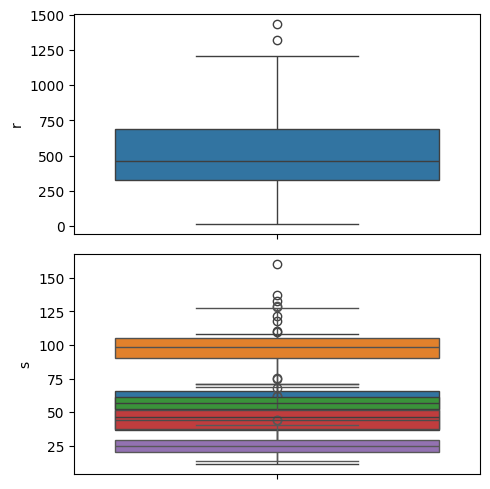

In [10]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['r'], ax = axs[0])
plt2 = sns.boxplot(df['s'], ax = axs[1])
plt2 = sns.boxplot(df['t'], ax = axs[1])
plt2 = sns.boxplot(df['u'], ax = axs[1])
plt2 = sns.boxplot(df['v'], ax = axs[1])
plt2 = sns.boxplot(df['w'], ax = axs[1])
plt.tight_layout()

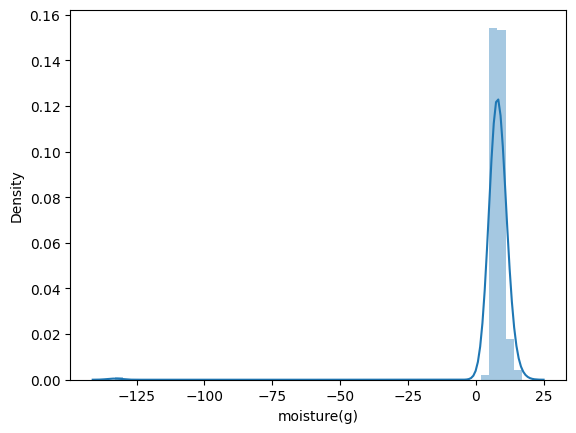

In [11]:
sns.distplot(df['moisture(g)']);

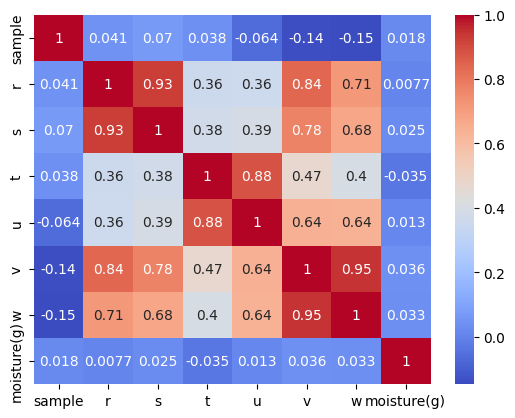

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [14]:
y_train.shape

(210,)

In [15]:
y_test.shape

(90,)

In [16]:
reg_model = linear_model.LinearRegression()

In [17]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [18]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  4.7986883390490345


[('r', -0.008296343230090023),
 ('s', 0.04801460514586123),
 ('t', -0.26902138674082804),
 ('u', 0.44685855429987015),
 ('v', 0.465416882605423),
 ('w', -0.6180692007558584)]

In [19]:
#Predicting the Test and Train set result
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)

In [20]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 7.53978928  5.89194354  6.26119906  7.12513429  6.80760884  7.46739915
  9.18054576  6.8313297  10.86653684  6.65460862  8.78816833  6.24783154
  4.1697339   7.43602464 11.76385446  9.61299905 10.1052996   5.40302279
  7.64339091  7.02408636  6.32018552  7.87628661  5.00862662  8.78811305
  5.88199527  5.05847094  6.84512958  4.56140706  6.63117789  4.36057527
  6.83149766  5.4024473   8.79515394  5.82650141  4.12744231  8.50434027
  8.88898889  6.81451808  7.37227224  8.04088849  7.80672698  8.59833694
 10.51974882  9.56352048  7.8813577   6.74651027  6.44256761  6.67535912
  8.58585258  6.24207918 10.39770627  8.4769728   6.1551754  10.43474306
  4.90487374  8.26086678  7.07222943  8.00799719  6.5238007   7.43469308
  8.19349387  8.02497399  7.37749378  9.93633127  8.4453628   5.5593288
  9.61599179  7.68500541 10.69985285  7.10915335  8.41787252  9.63133804
  8.62484308  5.84271983 10.33930214  7.84716108  9.35428999  5.28211878
  9.07769169  7.72151814  9

In [21]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
222,10.53,7.539789
139,6.24,5.891944
216,15.15,6.261199
201,7.58,7.125134
249,9.33,6.807609
...,...,...
229,7.98,7.822929
29,5.79,7.502268
205,9.04,6.885599
234,6.61,5.752192


from matplotlib import pyplot as plt
reg_model_diff['Actual value'].plot(kind='hist', bins=20, title='Actual value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reg_model_diff['Predicted value'].plot(kind='hist', bins=20, title='Predicted value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reg_model_diff.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
reg_model_diff['Actual value'].plot(kind='line', figsize=(8, 4), title='Actual value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
reg_model_diff['Predicted value'].plot(kind='line', figsize=(8, 4), title='Predicted value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 1.9638430267920657
Mean Square Error: 6.551473889243136
Root Mean Square Error: 2.5595847103081266


In [23]:
import pickle

# save
with open('/content/drive/MyDrive/Limonine/model.pkl','wb') as f:
    pickle.dump(reg_model,f)

# load
with open('/content/drive/MyDrive/Limonine/model.pkl', 'rb') as f:
    reg_model = pickle.load(f)
